In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
from bs4 import BeautifulSoup
from nltk import pos_tag, word_tokenize
from nltk.tokenize import sent_tokenize
import string

In [3]:
# load messi data into single string
messi_file_path = 'data/messi.json'

with open(messi_file_path, 'r') as file:
    messidata = json.load(file)

messitotalstring = ' '.join(messidata)

soup = BeautifulSoup(messitotalstring, 'html.parser')

p_tags = soup.find_all('p')

messistring=''
for tag in p_tags:
    messistring+=tag.get_text()+' '

messistring = re.sub("\n", " ", messistring)
messistring = re.sub("\s+", " ", messistring)
messistring = re.sub("\[.*?\]", " ", messistring)
messistring = messistring.lower()

In [4]:
# load trout data into single string
trout_file_path = 'data/trout.json'

with open(trout_file_path, 'r') as file:
    troutdata = json.load(file)

trouttotalstring = ' '.join(troutdata)

soup = BeautifulSoup(trouttotalstring, 'html.parser')

p_tags = soup.find_all('p')

troutstring=''
for tag in p_tags:
    troutstring+=tag.get_text()+' '

troutstring = re.sub("\n", " ", troutstring)
troutstring = re.sub("\s+", " ", troutstring)
troutstring = re.sub("\[.*?\]", " ", troutstring)
troutstring = troutstring.lower()

In [5]:
# load lebron data into single string
lebron_file_path = 'data/lebron.json'

with open(lebron_file_path, 'r') as file:
    lebrondata = json.load(file)

lebrontotalstring = ' '.join(lebrondata)

soup = BeautifulSoup(lebrontotalstring, 'html.parser')

p_tags = soup.find_all('p')

lebronstring=''
for tag in p_tags:
    lebronstring+=tag.get_text()+' '

lebronstring = re.sub("\n", " ", lebronstring)
lebronstring = re.sub("\s+", " ", lebronstring)
lebronstring = re.sub("\[.*?\]", " ", lebronstring)
lebronstring = lebronstring.lower()

In [6]:
# load mahomes data into single string
mahomes_file_path = 'data/mahomes.json'

with open(mahomes_file_path, 'r') as file:
    mahomesdata = json.load(file)

mahomestotalstring = ' '.join(mahomesdata)

soup = BeautifulSoup(mahomestotalstring, 'html.parser')

p_tags = soup.find_all('p')

mahomesstring=''
for tag in p_tags:
    mahomesstring+=tag.get_text()+' '

mahomesstring = re.sub("\n", " ", mahomesstring)
mahomesstring = re.sub("\s+", " ", mahomesstring)
mahomesstring = re.sub("\[.*?\]", " ", mahomesstring)
mahomesstring = mahomesstring.lower()

In [7]:
# load crosby data into single string
crosby_file_path = 'data/crosby.json'

with open(crosby_file_path, 'r') as file:
    crosbydata = json.load(file)

crosbytotalstring = ' '.join(crosbydata)

soup = BeautifulSoup(crosbytotalstring, 'html.parser')

p_tags = soup.find_all('p')

crosbystring=''
for tag in p_tags:
    crosbystring+=tag.get_text()+' '

crosbystring = re.sub("\n", " ", crosbystring)
crosbystring = re.sub("\s+", " ", crosbystring)
crosbystring = re.sub("\[.*?\]", " ", crosbystring)
crosbystring = crosbystring.lower()

In [8]:
messitokens = nltk.word_tokenize(messistring)
lebrontokens = nltk.word_tokenize(lebronstring)
trouttokens = nltk.word_tokenize(troutstring)
mahomestokens = nltk.word_tokenize(mahomesstring)
crosbytokens = nltk.word_tokenize(crosbystring)

In [9]:
print('Length of Messi Tokens:', len(messitokens))
print('Length of Lebron Tokens:', len(lebrontokens))
print('Length of Trout Tokens:', len(trouttokens))
print('Length of Mahomes Tokens:', len(mahomestokens))
print('Length of Crosby Tokens:', len(crosbytokens))

total = len(messitokens)+len(lebrontokens)+len(trouttokens)+len(mahomestokens)+len(crosbytokens)
print('Length of All Tokens:', total)

Length of Messi Tokens: 233613
Length of Lebron Tokens: 60329
Length of Trout Tokens: 94955
Length of Mahomes Tokens: 120312
Length of Crosby Tokens: 23903
Length of All Tokens: 533112


In [10]:
# compiling list of stopwords

punctuation_stop_list = string.punctuation

# originial list of stop words
stoplist = stopwords.words("english")

# adding more stop words
stoplist.extend([
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", 
    "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", 
    "can't", "cannot", "could", "couldn't", 
    "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", 
    "each", 
    "few", "for", "from", "further", 
    "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", 
    "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", 
    "let's", 
    "me", "more", "most", "mustn't", "my", "myself", 
    "no", "nor", "not", 
    "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves",
    ".", ",", "'s", "--", "n't", "ha", "wa"
])

# adding punctuation
stoplist.extend(punctuation_stop_list)

# adding more punctuation
stoplist.extend(["''", '``'])

stopwords = set(stoplist)

In [11]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1200000

index=['Messi', 'Lebron', 'Trout', 'Crosby', 'Mahomes']

# Your texts
texts = [" ".join(messitokens), " ".join(lebrontokens), " ".join(trouttokens), " ".join(crosbytokens), " ".join(mahomestokens)]

# Function to extract adjectives from a single document
def extract_adjectives(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == "ADJ"]

# Extract adjectives from each text
adjectives_per_text = [extract_adjectives(text) for text in texts]

# If you want to see the adjectives for each athlete
for x in range(len(index)):
    print(index[x])
    print(adjectives_per_text[x])

Messi
['first', 'more', 'incredible', 'happy', 'hard', 'leo', 'many', 'happy', 'least', 'more', 'first', 'extraordinary', 'good', 'unstoppable', 'difficult', 'crazy', 'former', 'muscular', 'record', 'foreseeable', 'little', 'left', 'only', 'long', 'next', 'small', 'next', 'rival', 'upper', 'upper', 'upper', 'more', 'small', 'opener', '2nd', 'last', 'red', 'little', 'most', 'next', 'regular', 'better', 'ordinary', 'little', 'less', 'old', 'red', 'only', 'former', 'first', 'full', 'associated', 'final', '78th', 'more', 'last', 'well', 'first', 'violent', 'first', 'competitive', 'former', 'usual', 'delighted', 'first', 'historic', 'nice', 'strong', 'second', 'long', 'rival', 'friendly', 'great', 'rival', 'last', 'last', 'social', 'exact', 'more', 'inaccurate', 'global', 'first', 'international', 'earlier', 'unlikely', 'last', 'global', 'main', 'international', 'saudi', 'general', 'major', 'big', 'biggest', 'messi', 'rich', 'last', 'last', 'other', 'last', 'portugal', 'great', 'french', 'u

In [12]:
# implement lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

messi_lemmatized = [lemmatizer.lemmatize(w) for w in messitokens]
lebron_lemmatized = [lemmatizer.lemmatize(w) for w in lebrontokens]
mahomes_lemmatized = [lemmatizer.lemmatize(w) for w in mahomestokens]
crosby_lemmatized = [lemmatizer.lemmatize(w) for w in crosbytokens]
trout_lemmatized = [lemmatizer.lemmatize(w) for w in trouttokens]

messi_nostopwords = [w for w in messi_lemmatized if w not in stopwords]
lebron_nostopwords = [w for w in lebron_lemmatized if w not in stopwords]
mahomes_nostopwords = [w for w in mahomes_lemmatized if w not in stopwords]
crosby_nostopwords = [w for w in crosby_lemmatized if w not in stopwords]
trout_nostopwords = [w for w in trout_lemmatized if w not in stopwords]

Messi Word Cloud

Frequency Distribution
[('the', 11868), (',', 10487), ('.', 8404), ('a', 5662), ('to', 5320), ('in', 5147), ('and', 4529), ('of', 3909), ("'s", 3353), ('messi', 2523), ('that', 2287), ('for', 2262), ('he', 2193), ('on', 2175), ('it', 2027), ('``', 1964), ('with', 1903), ("''", 1779), ('miami', 1778), ('is', 1755)]
 


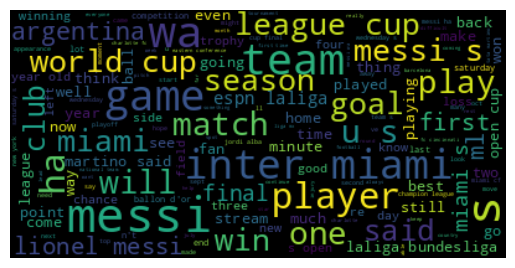

Lebron Word Cloud

Frequency Distribution
[('the', 3273), (',', 2619), ('.', 2324), ('a', 1476), ('to', 1472), ('in', 1294), ('and', 1257), ('of', 982), ("'s", 635), ('his', 629), ('he', 604), ('with', 524), ('james', 509), ('for', 502), ('that', 500), ('``', 497), ("''", 468), ('game', 446), ('it', 445), ('on', 443)]
 


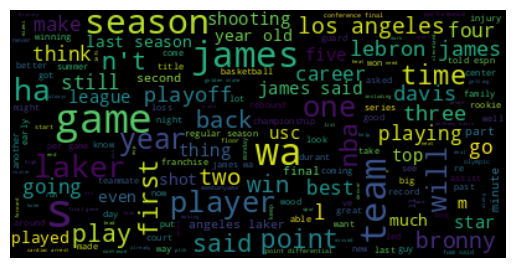

Mahomes Word Cloud

Frequency Distribution
[('the', 6112), (',', 5433), ('.', 4822), ('a', 3130), ('to', 2536), ('in', 2493), ('and', 2455), ('of', 1839), ('he', 1447), ("'s", 1357), ('for', 1132), ('that', 1041), ('is', 952), ('with', 938), ('it', 906), ('his', 889), ('(', 795), (')', 795), ('on', 785), ('season', 736)]
 


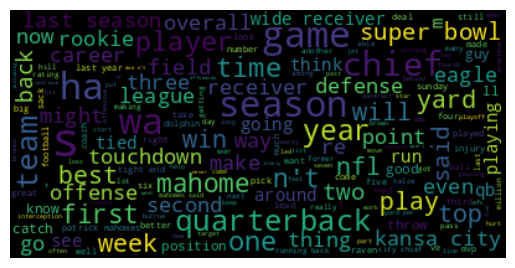

Crosby Word Cloud

Frequency Distribution
[('the', 1204), ('.', 1054), (',', 1013), ('a', 571), ('to', 536), ('in', 477), ('and', 471), ('of', 385), ("'s", 318), ('he', 280), ('for', 233), ('that', 229), ('``', 216), ('his', 215), ("''", 211), ('with', 207), ('wa', 207), ('crosby', 190), ('it', 181), ('on', 180)]
 


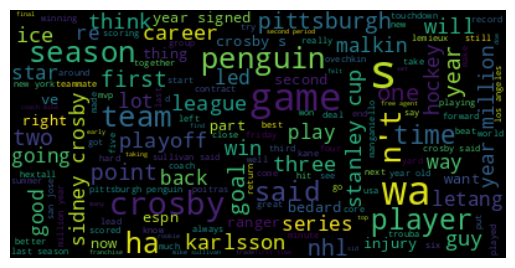

Trout Word Cloud

Frequency Distribution
[('the', 4662), (',', 4573), ('.', 3583), ('a', 2397), ('in', 1993), ('and', 1933), ('to', 1834), ('of', 1560), ('he', 1319), ("'s", 1133), ('his', 917), ('for', 776), ('that', 767), ('with', 717), ('is', 690), ('it', 683), ('on', 662), (':', 627), ('trout', 560), ('season', 534)]
 


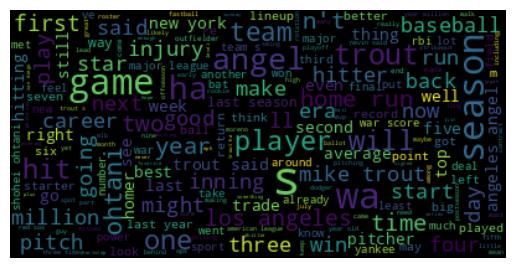

In [13]:
# building word clouds w stopwords

print('Messi Word Cloud')

fdist = nltk.FreqDist(messi_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

messitext = " ".join(messi_lemmatized)                                                                                                                                                                
wordcloud = WordCloud(max_font_size=40).generate(messitext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/messi.png')
plt.show()

print('Lebron Word Cloud')

fdist = nltk.FreqDist(lebron_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

lebrontext = " ".join(lebron_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(lebrontext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/lebron.png')
plt.show()

print('Mahomes Word Cloud')

fdist = nltk.FreqDist(mahomes_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

mahomestext = " ".join(mahomes_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(mahomestext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/mahomes.png')
plt.show()

print('Crosby Word Cloud')

fdist = nltk.FreqDist(crosby_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

crosbytext = " ".join(crosby_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(crosbytext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/crosby.png')
plt.show()

print('Trout Word Cloud')

fdist = nltk.FreqDist(trout_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

trouttext = " ".join(trout_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(trouttext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/trout.png')
plt.show()

Messi Word Cloud

Frequency Distribution
[('messi', 2523), ('miami', 1778), ('game', 1229), ('team', 1227), ('cup', 1144), ('league', 964), ('said', 943), ('inter', 864), ('player', 847), ('ml', 771), ('season', 699), ('goal', 680), ('world', 628), ('play', 626), ('match', 621), ('first', 593), ('one', 561), ('club', 540), ('argentina', 530), ('win', 504)]
 


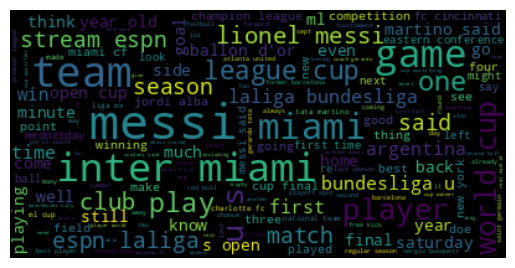

Lebron Word Cloud

Frequency Distribution
[('james', 509), ('game', 446), ('season', 375), ('team', 288), ('lakers', 281), ('said', 244), ('point', 209), ('year', 202), ('player', 177), ('nba', 173), ('first', 171), ('one', 164), ('final', 157), ('time', 126), ('last', 125), ('play', 121), ('davis', 117), ('lebron', 114), ('would', 112), ('bronny', 112)]
 


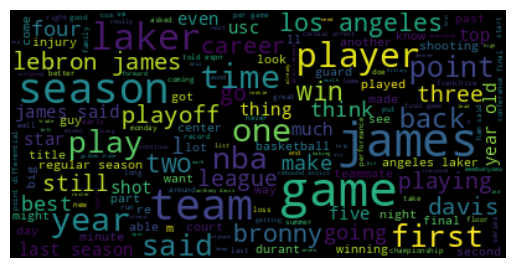

Mahomes Word Cloud

Frequency Distribution
[('season', 736), ('game', 651), ('chief', 492), ('mahomes', 465), ('year', 452), ('quarterback', 375), ('team', 372), ('yard', 360), ('player', 339), ('nfl', 329), ('said', 310), ('one', 308), ('first', 297), ('time', 296), ('last', 295), ('play', 272), ('week', 262), ('two', 252), ('get', 246), ('top', 241)]
 


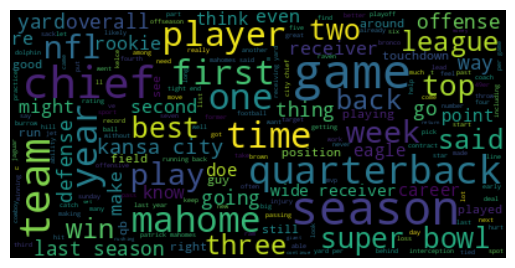

Crosby Word Cloud

Frequency Distribution
[('crosby', 190), ('game', 175), ('penguin', 128), ('season', 124), ('year', 124), ('said', 120), ('team', 99), ('player', 87), ('first', 72), ('pittsburgh', 72), ('time', 71), ('nhl', 59), ('one', 58), ('point', 54), ('karlsson', 51), ('million', 50), ('two', 48), ('last', 48), ('would', 47), ('cup', 46)]
 


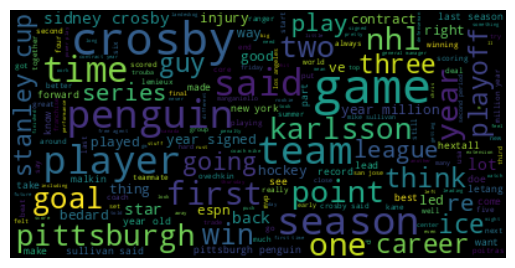

Trout Word Cloud

Frequency Distribution
[('trout', 560), ('season', 534), ('game', 456), ('angel', 442), ('year', 355), ('team', 317), ('said', 303), ('player', 288), ('run', 279), ('ohtani', 262), ('hit', 238), ('first', 235), ('one', 232), ('time', 215), ('last', 211), ('league', 198), ('two', 188), ('home', 180), ('million', 179), ('best', 166)]
 


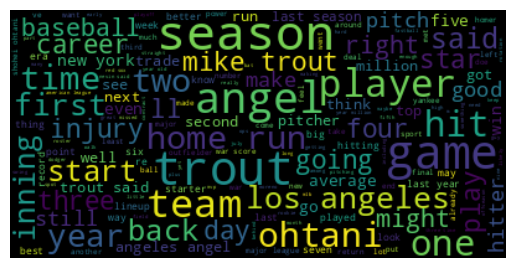

In [14]:
# building word clouds w/o stopwords

print('Messi Word Cloud')

fdist = nltk.FreqDist(messi_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

messitext = " ".join(messi_nostopwords)                                                                                                                                                                
wordcloud = WordCloud(max_font_size=40).generate(messitext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/messi.png')
plt.show()

print('Lebron Word Cloud')

fdist = nltk.FreqDist(lebron_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

lebrontext = " ".join(lebron_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(lebrontext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/lebron.png')
plt.show()

print('Mahomes Word Cloud')

fdist = nltk.FreqDist(mahomes_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

mahomestext = " ".join(mahomes_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(mahomestext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/mahomes.png')
plt.show()

print('Crosby Word Cloud')

fdist = nltk.FreqDist(crosby_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

crosbytext = " ".join(crosby_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(crosbytext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/crosby.png')
plt.show()

print('Trout Word Cloud')

fdist = nltk.FreqDist(trout_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

trouttext = " ".join(trout_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(trouttext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/trout.png')
plt.show()

In [15]:
def print_common_bigrams(tokenlist):
    
    bigrams = nltk.ngrams(tokenlist, 2)
    bigramlist = list(bigrams)
    
    # print out most frequent bigrams
    bigramfreq = nltk.FreqDist(bigramlist)
    top10bigrams = bigramfreq.most_common(10)
    top50bigrams = bigramfreq.most_common(50)

    # part a)
    print('** Most frequent bigrams **')
    for x in top10bigrams:
        print(x[0][0], x[0][1])

    
    # part b)
    print('\n** Most frequent bigrams with no stop words **')
    for x in top50bigrams:
        if x[0][0].lower() not in stoplist and x[0][1].lower() not in stoplist:
            print(x[0][0], x[0][1])


print('Messi Bigrams')
print_common_bigrams(messi_lemmatized)
print('\nLebron Bigrams')
print_common_bigrams(lebron_lemmatized)
print('\nTrout Bigrams')
print_common_bigrams(trout_lemmatized)
print('\nCrosby Bigrams')
print_common_bigrams(crosby_lemmatized)
print('\nMahomes Bigrams')
print_common_bigrams(mahomes_lemmatized)

Messi Bigrams
** Most frequent bigrams **
in the
. ``
of the
inter miami
, ''
, and
. ''
. the
, but
for the

** Most frequent bigrams with no stop words **
inter miami
world cup
league cup
lionel messi

Lebron Bigrams
** Most frequent bigrams **
in the
. ``
of the
, ''
. ''
the lakers
to the
, and
. the
on the

** Most frequent bigrams with no stop words **
los angeles
lebron james
james said

Trout Bigrams
** Most frequent bigrams **
in the
of the
. ``
. the
, but
the angel
. he
he 's
, and
for the

** Most frequent bigrams with no stop words **
home run
los angeles
mike trout

Crosby Bigrams
** Most frequent bigrams **
. ``
of the
in the
. the
. ''
, ''
the penguin
he 's
, and
said .

** Most frequent bigrams with no stop words **
stanley cup
sidney crosby
year signed

Mahomes Bigrams
** Most frequent bigrams **
in the
of the
. ``
. the
, but
, and
. he
the chief
he 's
for the

** Most frequent bigrams with no stop words **
super bowl
kansa city
last season


In [16]:
# import statement
from nltk.collocations import *

# Create the object you need to get collocations.
bigram_measures = nltk.collocations.BigramAssocMeasures()

def print_collocations(tokenlist):

    finder = BigramCollocationFinder.from_words(tokenlist)
    finder.apply_freq_filter(2)
    print('** Common Collocations **')
    for c in finder.nbest(bigram_measures.pmi, 10):
        print(" ".join(c))

print('Messi Collocations')
print_collocations(messi_lemmatized)
print('\nLebron Collocations')
print_collocations(lebron_lemmatized)
print('\nTrout Collocations')
print_collocations(trout_lemmatized)
print('\nCrosby Collocations')
print_collocations(crosby_lemmatized)
print('\nMahomes Collocations')
print_collocations(mahomes_lemmatized)

Messi Collocations
** Common Collocations **
2-1. talles
button-up collar
cuatro grandes
groupe amaury
marius bulter
michel platini
talles magno
trent alexander-arnold
warren zaire-emery
'hot lip

Lebron Collocations
** Common Collocations **
alperen sengun
bona fide
collective bargaining
concussion protocol
hakeem olajuwon
jason kidd
kentavious caldwell-pope
lisa leslie
madison square
mo bamba

Trout Collocations
** Common Collocations **
bryson stott
bud selig
carolina reaper
cedric mullins
charles barkley
domestic violence
framber valdez
free-swinging hacker
kendrys morale
kodai senga

Crosby Collocations
** Common Collocations **
cartilage transplant
conn smythe
fair amount
further specific
gold medal
greg wyshynski
hat trick
in-depth statistical
kasperi kapanen
la vega

Mahomes Collocations
** Common Collocations **
dresser winn
edmonton oiler
external defibrillator
foyesade oluokun
hand-eye coordination
j.k. dobbin
jameis winston
khalil mack
lionel messi
nico collins


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path
import pandas as pd
import glob

index=['Messi', 'Lebron', 'Trout', 'Crosby', 'Mahomes']
alltexts = [" ".join(messi_nostopwords), " ".join(lebron_nostopwords), " ".join(trout_nostopwords), " ".join(crosby_nostopwords), " ".join(mahomes_nostopwords),]

tfidf_vectorizer = TfidfVectorizer(input='content', stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(alltexts)

tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=index, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document', 'level_1': 'term'})
top_terms = tfidf_df.sort_values(by=['document', 'tfidf'], ascending=[True, False]).groupby(['document']).head(10)

top_terms

,document,term,tfidf
44672,Crosby,crosby,0.416764
50360,Crosby,penguin,0.339095
46652,Crosby,game,0.294979
54778,Crosby,year,0.240640
52142,Crosby,season,0.203380
51938,Crosby,said,0.189407
53433,Crosby,team,0.155252
53176,Crosby,sullivan,0.143358
53632,Crosby,time,0.138174
50570,Crosby,player,0.135069


In [18]:
# this code will create the heatmap 

import altair as alt
import numpy as np


# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_terms.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_terms.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)


alt.LayerChart(...)

In [19]:
# tfidf for adjectives

index=['Messi', 'Lebron', 'Trout', 'Crosby', 'Mahomes']
alltexts = [" ".join(adjectives_per_text[0]), " ".join(adjectives_per_text[1]), " ".join(adjectives_per_text[2]), " ".join(adjectives_per_text[3]), " ".join(adjectives_per_text[4]),]

tfidf_vectorizer = TfidfVectorizer(input='content', stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(alltexts)

tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=index, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document', 'level_1': 'term'})
top_terms = tfidf_df.sort_values(by=['document', 'tfidf'], ascending=[True, False]).groupby(['document']).head(10)

top_terms

,document,term,tfidf
7729,Crosby,good,0.339313
8606,Crosby,second,0.307503
8262,Crosby,old,0.243881
7679,Crosby,free,0.212071
8654,Crosby,sid,0.200274
7134,Crosby,best,0.180260
7738,Crosby,great,0.169657
8876,Crosby,total,0.162978
7707,Crosby,general,0.159053
7784,Crosby,high,0.159053


In [20]:
# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_terms.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_terms.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

alt.LayerChart(...)